# Imports

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import plotly.express    as px
import matplotlib.pyplot as plt

from IPython.core.display  import HTML
from tabulate              import tabulate
from geopy.geocoders       import Nominatim

## Helper Functions

In [2]:
def personal_settings():
     # plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
        
    # notebook settings
    display(HTML('<style>.container{width:90% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)

        
    # seaborn settings
    sns.set(rc={'figure.figsize':(15,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.5)

In [3]:
personal_settings()

## Loading Data

In [4]:
df_raw = pd.read_csv(r'../datasets/raw/kc_house_data.csv')

# Data Description

In [5]:
df1=df_raw.copy()

## Rename Columns

In [6]:
# checking columns names
df1.columns # nothing to rename

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Dimension

In [7]:
print('Number of rows: {}' .format (df1.shape[0]))
print('Number of columns: {}' .format (df1.shape[1]))

Number of rows: 21613
Number of columns: 21


## Data Types

In [10]:
display(df1.head())
df1.dtypes

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Check NA

In [11]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Fill out NA

In [12]:
# nothing to fill

## Change Variables Types

In [38]:
# ===== dtypes before =====
# id                 int64
# date              object
# price            float64
# bedrooms           int64
# bathrooms        float64
# sqft_living        int64
# sqft_lot           int64
# floors           float64
# waterfront         int64
# view               int64
# condition          int64
# grade              int64
# sqft_above         int64
# sqft_basement      int64
# yr_built           int64
# yr_renovated       int64
# zipcode            int64
# lat              float64
# long             float64
# sqft_living15      int64
# sqft_lot15         int64
# dtype: object

In [13]:
# changing 'date' type from OBJECT to DATE or INT

# checking DATES types
print("------ BEFORE")
display(df1[['date','yr_built','yr_renovated']].head())
display(df1[['date','yr_built','yr_renovated']].dtypes)

# changing dtypes
df1['date']         = pd.to_datetime(df1['date'],         format='%Y-%m-%d')
# df1['yr_built']     = pd.to_datetime(df1['yr_built'],     format='%Y-%m-%d')
# df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format='%Y-%m-%d')

# checking DATES types
print("")
print("------ AFTER")
display(df1[['date','yr_built','yr_renovated']].head())
display(df1[['date','yr_built','yr_renovated']].dtypes)

------ BEFORE


,date,yr_built,yr_renovated
0,20141013T000000,1955,0
1,20141209T000000,1951,1991
2,20150225T000000,1933,0
3,20141209T000000,1965,0
4,20150218T000000,1987,0


date            object
yr_built         int64
yr_renovated     int64
dtype: object


------ AFTER


,date,yr_built,yr_renovated
0,2014-10-13,1955,0
1,2014-12-09,1951,1991
2,2015-02-25,1933,0
3,2014-12-09,1965,0
4,2015-02-18,1987,0


date            datetime64[ns]
yr_built                 int64
yr_renovated             int64
dtype: object

## Dropping Duplicates

In [14]:
print(df1.shape[0], 'number of rows')
print(df1['id'].unique().shape[0], 'uniques ids')
print(df1.shape[0] - df1['id'].unique().shape[0], '  number of duplicated ids')

21613 number of rows
21436 uniques ids
177   number of duplicated ids


In [15]:
# sorting dataframe by date
df1 = df1.sort_values('date', ascending=True)

# deleting ids that appears first
df1 = df1.drop_duplicates(subset='id', keep='last')

print('new shape:', df1.shape)

new shape: (21436, 21)


## Descriptive Statistical

In [16]:
num_df1 = df1.select_dtypes(include=['int64','float64'])
cat_df1 = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [17]:
num_df1.shape

(21436, 20)

In [18]:
# central tendendy - mean, median
ct1 = pd.DataFrame(num_df1.apply(np.mean)).T
ct2 = pd.DataFrame(num_df1.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_df1.apply(np.std)).T
d2 = pd.DataFrame(num_df1.apply(min)).T
d3 = pd.DataFrame(num_df1.apply(max)).T
d4 = pd.DataFrame(num_df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_df1.apply(lambda x: x.kurtosis)).T

# concatenate 
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580765328.18,3904921185.00,2876522535.73,0.24,<bound method NDFrame._add_numeric_operations....
1,price,75000.00,7700000.00,7625000.00,541649.96,450000.00,367306.36,4.04,<bound method NDFrame._add_numeric_operations....
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.99,<bound method NDFrame._add_numeric_operations....
3,bathrooms,0.00,8.00,8.00,2.12,2.25,0.77,0.51,<bound method NDFrame._add_numeric_operations....
4,sqft_living,290.00,13540.00,13250.00,2082.70,1920.00,919.13,1.47,<bound method NDFrame._add_numeric_operations....
5,sqft_lot,520.00,1651359.00,1650839.00,15135.64,7614.00,41537.65,13.04,<bound method NDFrame._add_numeric_operations....
6,floors,1.00,3.50,2.50,1.50,1.50,0.54,0.61,<bound method NDFrame._add_numeric_operations....
7,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.34,<bound method NDFrame._add_numeric_operations....
8,view,0.00,4.00,4.00,0.24,0.00,0.77,3.39,<bound method NDFrame._add_numeric_operations....
9,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.04,<bound method NDFrame._add_numeric_operations....


### Categorical Attributes

In [19]:
cat_df1.shape # no attributes

(21436, 0)

# Variable Filtering 

In [20]:
df2 = df1.copy()

In [21]:
df2 = df2.drop (['view','sqft_living15','sqft_lot15'], axis=1)

# === notes:
# view          	An index from 0 to 4 of how good the view of the property was
# sqft_living15 	The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15    	The square footage of the land lots of the nearest 15 neighbors

In [22]:
# checking properties 'sqft_living' by number of 'bedrooms'
print(df2[['bedrooms','sqft_living']].groupby(['bedrooms']).mean().sort_values('sqft_living', ascending=True))
print(df2[['id','bedrooms']].groupby(['bedrooms']).count(),'\n')

# droping properties with bedrooms equal 0, 11 or 33 (understanding as outliers)
df2 = df2[ (df2['bedrooms']!=0) & (df2['bedrooms']!=11) & (df2['bedrooms']!=33) ]

          sqft_living
bedrooms             
1              884.94
2             1240.54
33            1620.00
0             1707.85
3             1807.60
4             2556.00
11            3000.00
5             3054.82
6             3310.76
10            3706.67
9             3775.00
8             3800.00
7             3974.21
            id
bedrooms      
0           13
1          194
2         2736
3         9731
4         6849
5         1586
6          265
7           38
8           13
9            6
10           3
11           1
33           1 



# Feature Engineering

In [23]:
df3 = df2.copy()

## Mind Map Hypothesis

## Creating Hypothesis

## Feature Engineering

In [52]:
# mean price by zipcode

In [53]:
# decision: 1 = buy, 0 = hold

In [54]:
# sale price suggestion

In [55]:
# expected profit

# EDA

In [24]:
df4 = df3.copy()

In [25]:
num_df4 = df4.select_dtypes(include=['int64','float64'])
cat_df4 = df4.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## Univariate Analysis

### Response Variable

### Numerical Variables

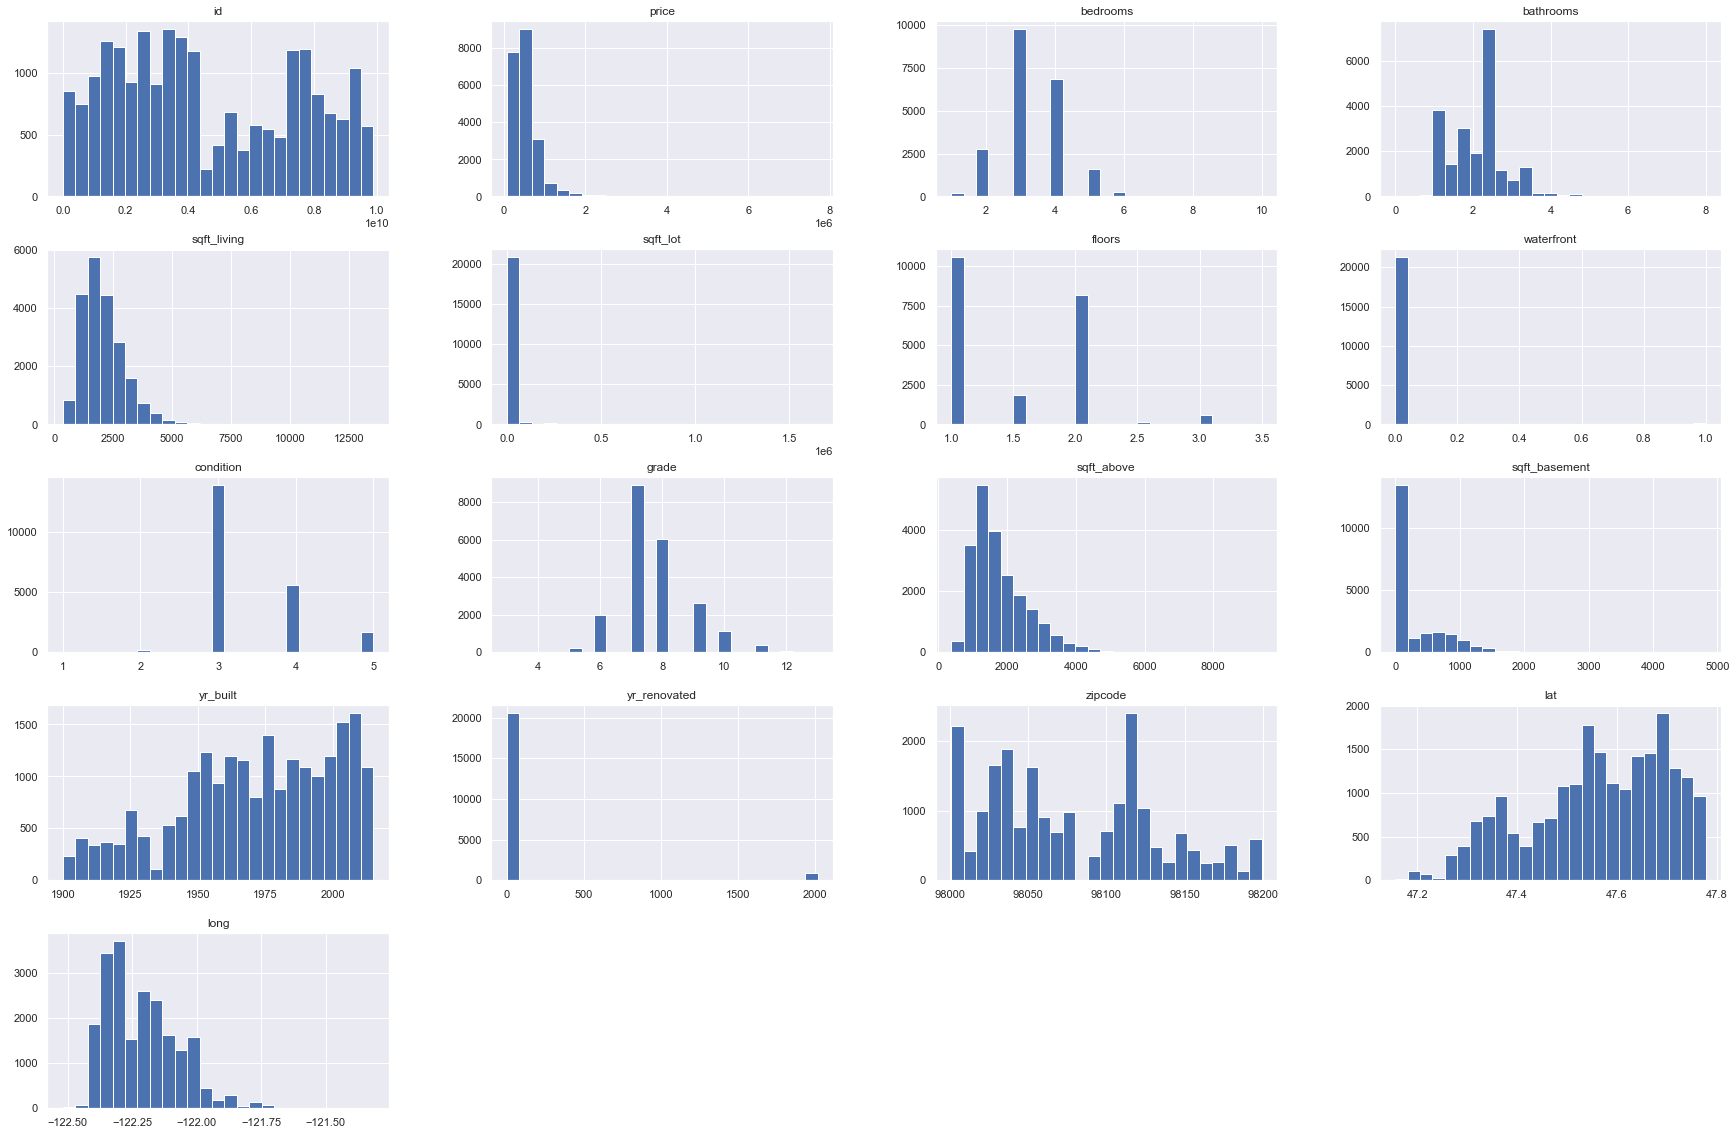

In [27]:
sns.set(rc={'figure.figsize':(30,20)})
num_df4.hist(bins=25);
personal_settings()

### Categorical Variables

In [28]:
cat_df4.shape

(21421, 0)

## Bivariate Analysis

In [29]:
print('Hypothesis Resume \n\n')
tab = [ ['Hypothesis', 'Conclusion', 'Relevance'],
        ['H1','True/False','High/Low'],
      ]

print(tabulate(tab, headers = 'firstrow'))

Hypothesis Resume 


Hypothesis    Conclusion    Relevance
------------  ------------  -----------
H1            True/False    High/Low


### H1 

## Multivatiate Analysis

### Numerical Attributes

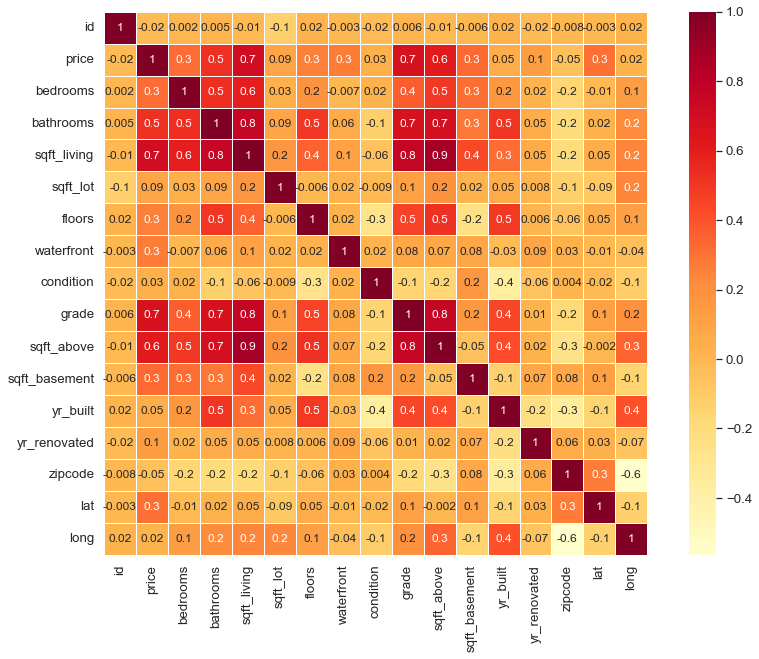

In [30]:
correlation = num_df4.corr(method='pearson')
sns.set(font_scale=1.2)
sns.heatmap(correlation, 
            cmap='YlOrRd', 
            annot=True, 
            annot_kws= {'fontsize':'small'},
            fmt='.1g',
            linewidths=0.8, 
            square=True );

### Categorical Attributes

In [31]:
cat_df4.shape

(21421, 0)

# Conclusion and Visualization

In [33]:
df5 = df4.copy()

In [ ]:
# Mainly Insights

In [ ]:
# Decision Dataframe Overview

In [ ]:
# Expected Profit Overview